In [13]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sb
import urllib
import os

if not os.path.exists('wages.txt'):
    # Download the file if it is not present
    urllib.request.urlretrieve('http://lib.stat.cmu.edu/datasets/CPS_85_Wages', 'wages.txt')
    
# Give names to the columns
names = [
    'EDUCATION: Number of years of education',
    'SOUTH: 1=Person lives in South, 0=Person lives elsewhere',
    'SEX: 1=Female, 0=Male',
    'EXPERIENCE: Number of years of work experience',
    'UNION: 1=Union member, 0=Not union member',
    'WAGE: Wage (dollars per hour)',
    'AGE: years',
    'RACE: 1=Other, 2=Hispanic, 3=White',
    'OCCUPATION: 1=Management, 2=Sales, 3=Clerical, 4=Service, 5=Professional, 6=Other',
    'SECTOR: 0=Other, 1=Manufacturing, 2=Construction',
    'MARR: 0=Unmarried,  1=Married',
]

short_names = [n.split(':')[0] for n in names]

df = pd.read_csv('wages.txt', skiprows=27, skipfooter=6, sep=None, header=None)
df.columns = short_names
df['WAGE'] = np.log10(df['WAGE'])
df.head()

/Users/akira/program/venvs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:31: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.


,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,WAGE,AGE,RACE,OCCUPATION,SECTOR,MARR
0,8,0,1,21,0,0.707570,35,2,6,1,1
1,9,0,1,42,0,0.694605,57,3,6,1,1
2,12,0,0,1,0,0.824126,19,3,6,1,0
3,12,0,0,4,0,0.602060,22,3,6,0,0
4,12,0,0,17,0,0.875061,35,3,6,0,1


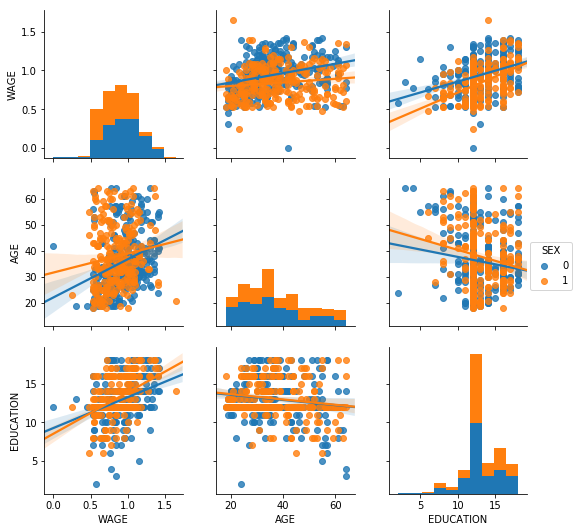

In [14]:
sb.pairplot(df,
                    vars=['WAGE', 'AGE', 'EDUCATION'],
                    kind='reg',
                    hue='SEX')

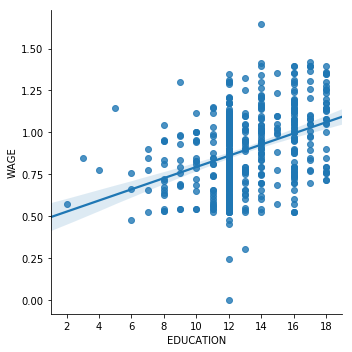

In [15]:
sb.lmplot(y='WAGE', x='EDUCATION', data=df)

In [23]:
import statsmodels.formula.api as smf

model = smf.ols(formula = 'WAGE ~ EDUCATION + SEX + EDUCATION * SEX',
                            data = df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   WAGE   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     43.72
Date:                Sun, 15 Apr 2018   Prob (F-statistic):           2.94e-25
Time:                        16:32:50   Log-Likelihood:                 88.503
No. Observations:                 534   AIC:                            -169.0
Df Residuals:                     530   BIC:                            -151.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.5748      0.058      9.861